In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})
from ipywidgets import interactive

### Домашние задания

1. Проведите небольшое исследование алгоритма градиентного спуска. Оцените влияние значений скорости обучения (`alpha`) и количества итераций на ошибку алгоритма. Как связаны эти два гиперпараметра между собой? Подберите скорость обучения и количество итераций до совпадения ответов алгоритма с результатами МНК. Как можно ускорить процесс вычисления весов?  

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],   # для умножения на intercept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]]).T # стаж репетитора
Y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
X

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [3]:
w = np.linalg.inv(X.T @ X) @ X.T @ Y
w

array([47.23214286,  3.91071429])

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
def train(w, X, Y, alpha, iterations = 1001, debug = 0):
    losses = []
    n = X.shape[0]
    for i in range(10**6):
        y_pred = np.dot(w, X.T)
        err = calc_mse(Y, y_pred)
        for j in range(w.shape[0]):
            w[j] -= alpha * (1/n * 2 * np.sum(X[:,j] * (y_pred - Y)))
        if i % 50 == 0:
            losses.append(err)
        if debug and i % 100 == 0:
            print(i, w, err) # МНК: array([47.23214286,  3.91071429]) 45.937499999999986
        if i >= iterations:
            break
    return losses

In [8]:
loss_matrix = []
alpha_range = [1e-4, 1e-3, 1e-2, 0.06631]
for alpha in alpha_range:
    w = np.array([1, 0.5])
    loss_matrix.append(train(w, X, Y, alpha))

In [9]:
import matplotlib.pyplot as plt

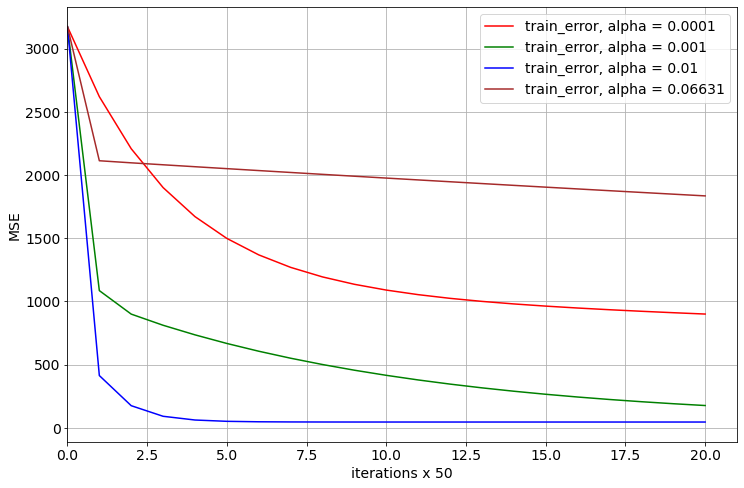

In [10]:
plt.figure(figsize = (12, 8));
plt.xlabel('iterations x 50')
plt.ylabel('MSE')
plt.xlim(0, len(loss_matrix[0]))
for i, (alpha, color) in enumerate(zip(alpha_range, ['red', 'green', 'blue', 'brown'])):
    plt.plot(list(range(len(loss_matrix[0]))), loss_matrix[i], color = color, label=f'train_error, alpha = {alpha}')
plt.legend(loc='upper right')
plt.grid()
plt.show()

Из графика видна зависимость скорости обучения alpha и значения функции ошибки от итераций обучения. Ожидаемо, при увеличении alpha ошибка на одном и том же уровне итераций снижается, но только до определенного предела. Например, в случае alpha=0.01 мы имеем большую скорость снижения ошибки, чем при alpha=0.001 и чем при alpha=0.0001. Однако, эта закономерность работает только до определенного предела, см. коричневый график. Как только скорость обучения становится слишком большой, алгоритм начинает расходиться, совершая все увеличивающиеся градиентные шаги, что уводит значение ошибки в бесконечность с экспоненциальной скоростью. 

Попробуем подобрать параметры обучения так, чтобы получить значения, близкие к вычисляемым аналитически. Чтобы точнее попасть в реальное значение минимума, необходимо максимально уменьшить learning rate, в результате чего придется совершить много повторений. Правда, если у функции несколько минимумов, это может привести к тому, что мы окажемся в локальном минимуме и не сможем из него выйти.

In [15]:
w = np.array([1, 0.5])
train(w, X, Y, 0.0001, iterations = 200000)
w

array([47.23214282,  3.91071429])

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [28]:
w = np.array([1, 0.5])
alpha = 0.01
for i in range(2001):
    y_pred = np.dot(w, X.T)
    err = calc_mse(Y, y_pred)
    w -= (alpha * (1 / X.shape[0] * 2 * np.dot(X.T, (y_pred - Y))))
    if i % 200 == 0:
        print(i, w, err) # [47.23214286  3.91071429] 45.937499999999986

0 [2.102 3.9  ] 3173.15
200 [41.83683774  4.90699865] 61.9177717428135
400 [46.56511152  4.03388672] 46.181755648107604
600 [47.14967657  3.92594232] 45.941233404700036
800 [47.2219474   3.91259695] 45.93755706443538
1000 [47.23088237  3.91094704] 45.937500872219864
1200 [47.23198702  3.91074306] 45.93750001333172
1400 [47.23212359  3.91071784] 45.937500000203784
1600 [47.23214048  3.91071473] 45.93750000000313
1800 [47.23214256  3.91071434] 45.93750000000003
2000 [47.23214282  3.91071429] 45.93750000000001
